# Iris classification with FermionicPQCKernel

In this example, you will see how to do data classification with the `FermionicPQCKernel` using the `FixedSizeSVC` model from the MatchCake package. The `FermionicPQCKernel` is a kernel that encode the data into fermionic RXX and fermionic RZZ gates before using fWAP gate to entangle the nearest neighbors qubits together.


# Imports

First, we need to import the necessary packages. We will use the `datasets` module from `sklearn` to load the Iris dataset, the `train_test_split` function to split the dataset into training and testing sets, and the `MinMaxScaler` to scale the data. We will also import the `FixedSizeSVC` model from the `matchcake.ml.ml_kernel` module and the `FermionicPQCKernel` from the `matchcake.ml.kernels` module.

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from matchcake.ml.ml_kernel import FixedSizeSVC, FermionicPQCKernel
from matchcake.ml.visualisation import ClassificationVisualizer

# Parameters

We will define our hyperparameters here. We will use 4 qubits to encode the data.

In [2]:
n_qubits = 4

# Load the data

We will load the Iris dataset and scale the data to the range [0, 1].

In [3]:
dataset = datasets.load_iris(as_frame=True)
X, y = dataset.data, dataset.target

In [4]:
X = MinMaxScaler(feature_range=(0, 1)).fit_transform(X)

# Split the data

We will split the data into training and testing sets.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Build the model

We will build the model using the `FixedSizeSVC` model and the `FermionicPQCKernel`.

In [6]:
model = FixedSizeSVC(kernel_cls=FermionicPQCKernel, kernel_kwargs=dict(size=n_qubits), random_state=0)

# Train the model

We will train the model using the training data.

In [7]:
model.fit(x_train, y_train)

FixedSizeSVC(kernel_cls=<class 'matchcake.ml.ml_kernel.FermionicPQCKernel'>,
             kernel_kwargs={'size': 4})

# Draw the kernel

We can draw the kernel to visualize the fermionic RXX and RZZ gates.

(<Figure size 900x500 with 1 Axes>, <Axes: >)

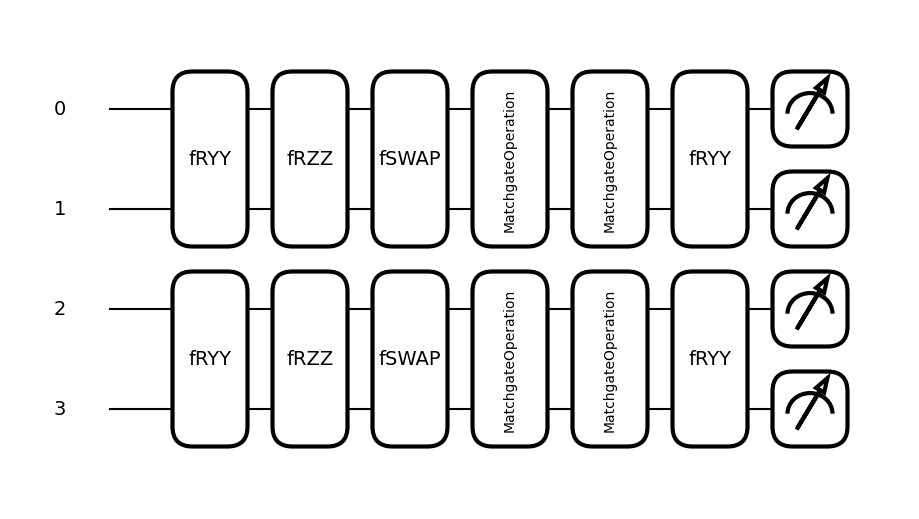

In [8]:
model.kernels[0].draw_mpl()

# Evaluate the model

We will evaluate the model using the testing data.

In [9]:
test_accuracy = model.score(x_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Test accuracy: 96.67%


# Visualize the results

We can visualize the decision boundaries of the model.

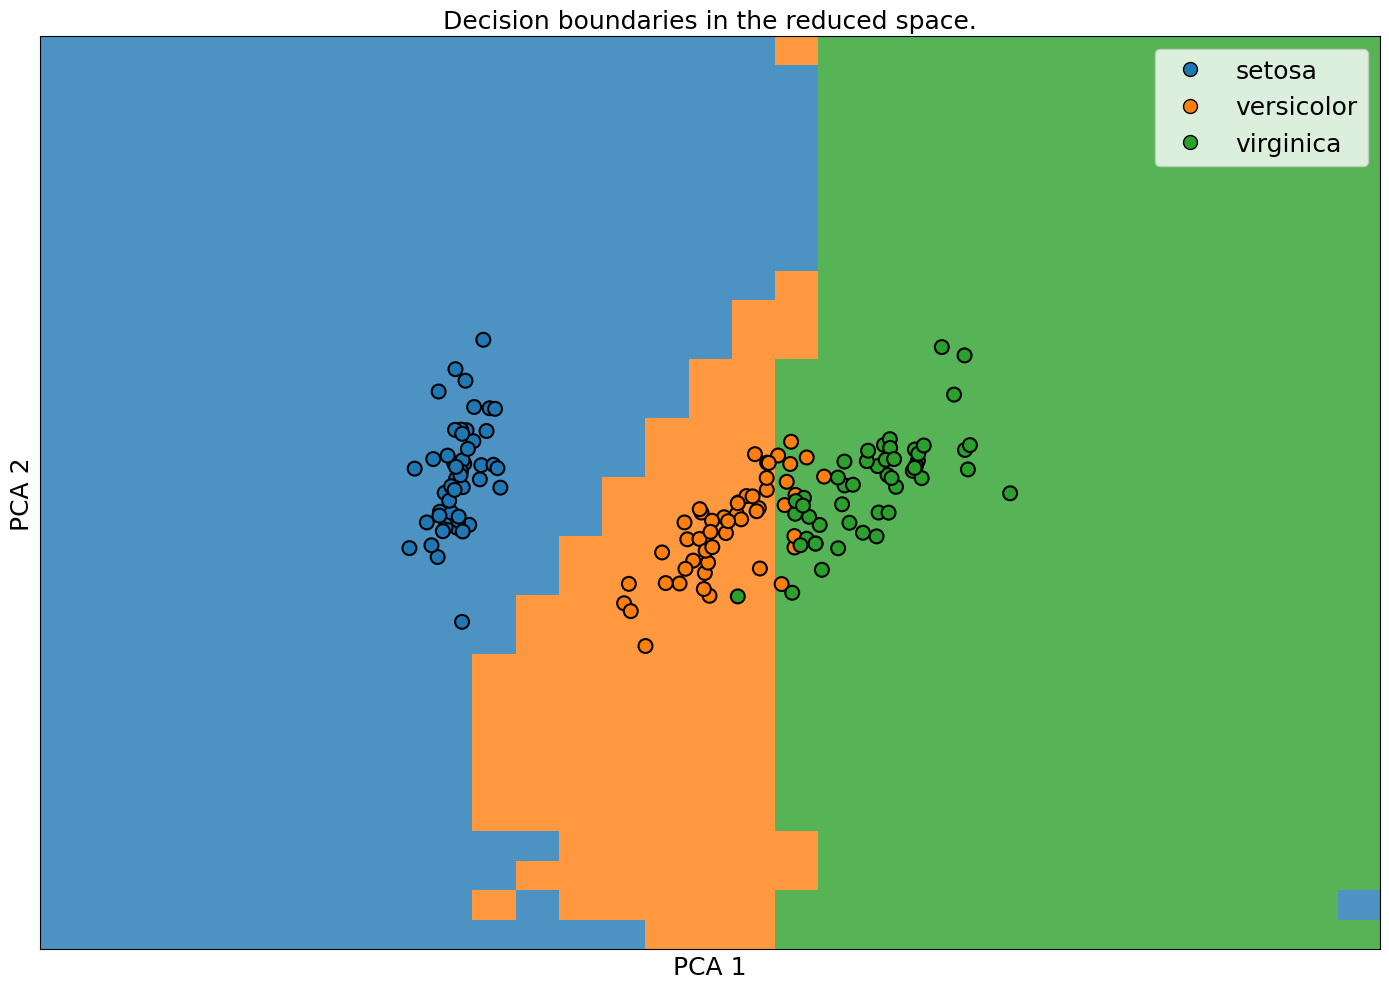

In [10]:
viz = ClassificationVisualizer(x=X, n_pts=1_000)
fig, ax, y_pred = viz.plot_2d_decision_boundaries(
    model=model, y=y, legend_labels=getattr(dataset, "target_names", None), show=True
)